# Smoothing a Graph

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MglEfisPlotter import *

In [2]:
datafile = 'flight03/IEFISBB.DAT'
minTimestamp = 429600874
maxTimestamp = 1000000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
for i in range(0, len(flights)):
    print(i, flights[i])
f = flights[-1]

0 Flight at 2019-02-03 11:10:08 to 2019-02-03 11:10:10,    28 messages, timestamps 478,589,574 to 478,589,577
1 Flight at 2019-02-13 14:14:20 to 2019-02-13 14:29:57,  3969 messages, timestamps 479,912,850 to 479,913,848
2 Flight at 2019-03-18 18:07:28 to 2019-03-18 18:08:43,   328 messages, timestamps 484,778,459 to 484,778,537
3 Flight at 2019-03-18 17:09:11 to 2019-03-18 17:09:29,    86 messages, timestamps 484,774,471 to 484,774,490
4 Flight at 2019-03-19 13:18:49 to 2019-03-19 14:02:02,  9954 messages, timestamps 484,889,570 to 484,892,801
5 Flight at 2019-03-19 15:46:45 to 2019-03-19 17:10:15, 21143 messages, timestamps 484,899,755 to 484,905,614


## Raw Data

The raw data has multiple datapoints per second (per timestamp) and timestamps almost every second (almost 60 per minute).

In [3]:
asi = pd.DataFrame(f.listData('asi'))
asi.head(10)

,minutes,timestamp,asi
0,0.000000,484899755,43.412527
1,0.000000,484899755,33.855292
2,0.000000,484899755,43.412527
3,0.066667,484899759,60.799136
4,0.066667,484899759,65.172786
5,0.083333,484899761,70.356371
6,0.083333,484899761,70.356371
7,0.166667,484899766,86.879050
8,0.166667,484899766,86.879050
9,0.250000,484899770,98.164147


When plotted, this makes a jagged graph

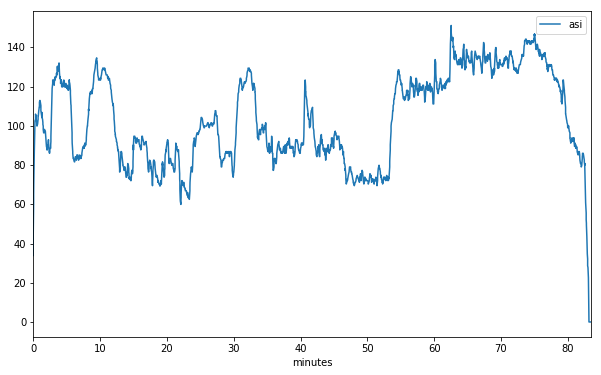

In [4]:
asi.plot(x='minutes', y='asi', figsize=(10,6))

## Smooth the Data

Transform the data:

* Round the minutes to one decimal place.
* Group the VSI values by minute value (tenths of a minute).
* Calculate the mean of each group.

In [11]:
t = asi.round(1).groupby(['minutes'])[['asi']].mean()
t.head(10)

,asi
minutes,
0.0,40.233333
0.1,66.700000
0.2,92.975000
0.3,102.500000
0.4,104.757143
0.5,102.500000
0.6,100.650000
0.7,104.250000
0.8,106.833333


The plot looks nicer now

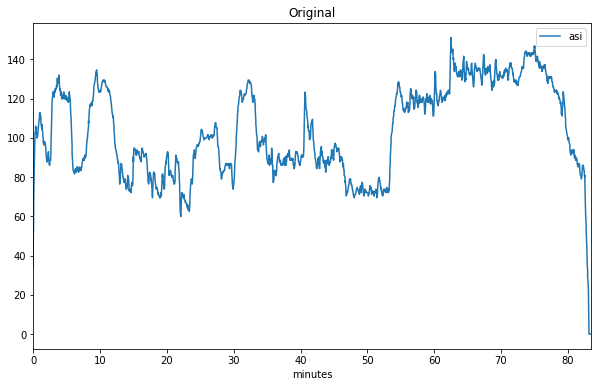

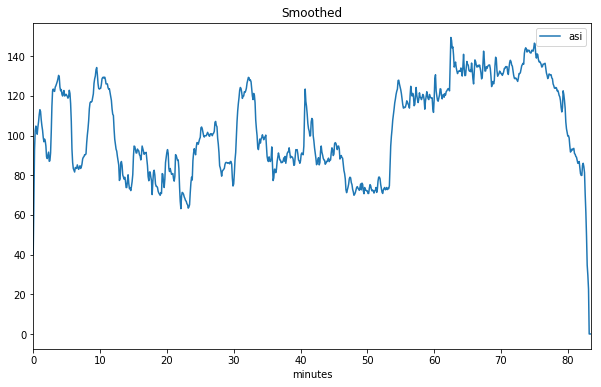

In [12]:
asi.plot(x='minutes', y='asi', title='Original', figsize=(10,6))
plt.show()
t.plot(title='Smoothed', figsize=(10,6))
plt.show()

## Rolling

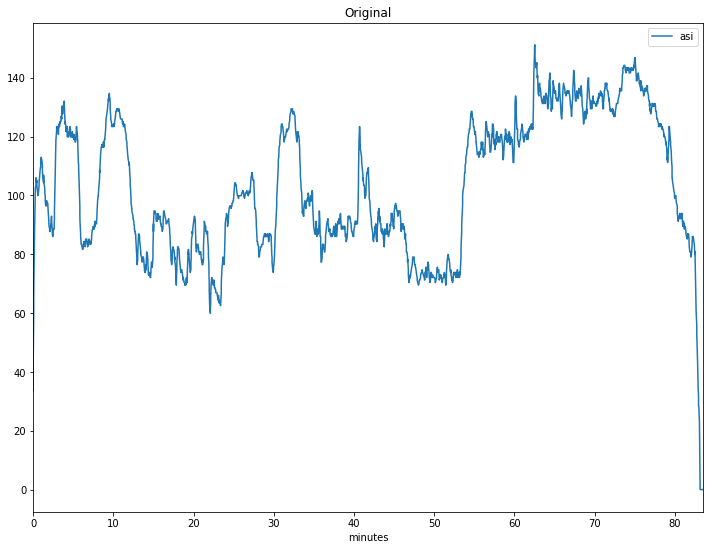

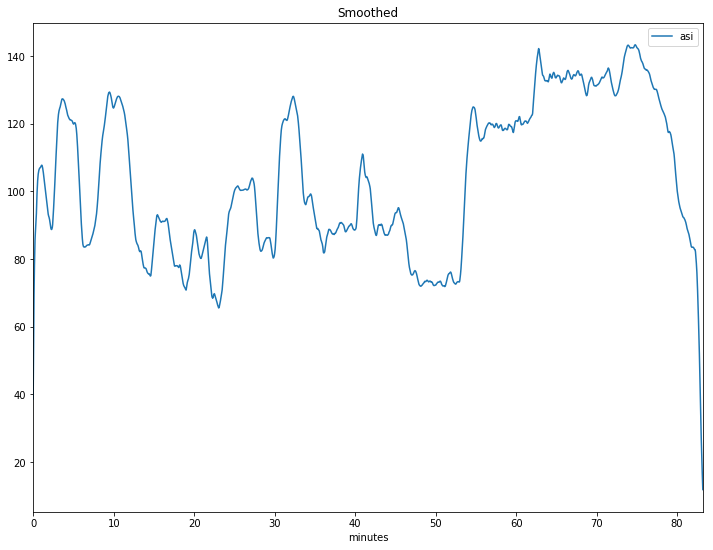

In [41]:
t = asi.rolling(32, min_periods=1).mean()
asiSmooth = pd.DataFrame(t)

figsize = (12, 9)

asi.plot(x='minutes', y='asi', title='Original', figsize=figsize)
plt.show()
asiSmooth.plot(x='minutes', y='asi', title='Smoothed', figsize=figsize)
plt.show()